In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import nltk
import datetime
import matplotlib.patches as mpatches
from nltk.corpus import wordnet as wn

In [477]:

df = pd.read_csv('data.csv')

In [181]:
curid = -1

def fix_ids(x):
    global curid
    curid += 1
    return curid

df['Id'] = df['Id'].apply(fix_ids)

In [481]:
df = df.dropna()
# Removing outliers
df = df.drop(df[df['HighestSalary'] == 999].index)
df = df.drop(df[df['LowestSalary'] == 0].index)

In [482]:
df[df['LowestSalary'] == 0]
df[df['HighestSalary'] == 999]

Empty DataFrame
Columns: [Id, Title, Company, Date, Location, Area, Classification, SubClassification, Requirement, FullDescription, LowestSalary, HighestSalary, JobType]
Index: []

In [178]:
df["FullDescription"] = df["FullDescription"].str.replace(r"(\s*\<.*?\>\s*)", " ").str.strip()
df["FullDescription"] = df["FullDescription"].str.replace(r"&nbsp;", " ").str.strip()

In [483]:
df["Date"] = df["Date"].str.replace(r"T00:00:00.000Z", " ").str.strip()

In [484]:
def add_month_from_date(x):
    return int(x.split('-')[1])
    
mth_field = [''] * len(df)
df['MonthPosted'] = mth_field
df['MonthPosted'] = df['Date'].apply(add_month_from_date)

In [487]:
df['Date'] = pd.to_datetime(df['Date'])

In [504]:
avg_salary = [0] * len(df)
print(len(df))
print(len(avg_salary))
df['AverageSalary'] = avg_salary
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

86479
86479


In [80]:
salary_by_location = df.groupby('Location')['AverageSalary'].mean().nlargest(5)
salary_by_classification = df.groupby('Classification')['AverageSalary'].mean().nlargest(10)

In [18]:
salary_by_location.head(5)

Location
Sydney       102.204630
Brisbane      89.867512
Melbourne     87.680859
Perth         87.170869
Name: AverageSalary, dtype: float64

In [72]:
salary_by_classification.head(20)

Classification
CEO & General Management                  259.081152
Information & Communication Technology    176.958404
Consulting & Strategy                     166.152174
Mining, Resources & Energy                156.772727
Construction                              135.088204
Engineering                               126.715598
Legal                                     125.069005
Banking & Financial Services              122.399403
Healthcare & Medical                      111.176035
Government & Defence                      103.814330
Name: AverageSalary, dtype: float64

In [541]:
def plot_linegraph(series, xlabel, ylabel, title, c='green', rotate_x_axis=False):
    fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(series, color=c)
    plt.title(title)
    ax = plt.subplot()
    ax.set_xlabel(xlabel, fontsize='16')
    ax.set_ylabel(ylabel, fontsize='16')
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    if rotate_x_axis:
        ax.set_xticklabels(rotation = (340), fontsize = 12, va='top', ha='left', labels=series.index)
    plt.show()

In [680]:
def plot_bargraph(series, xlabel, ylabel, title, c='green', rotate_x_axis=False, r=340):
    fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    objects = series.index
    y_pos = np.arange(len(objects))
    performance = series.values
    ax = plt.subplot()
    plt.bar(y_pos, performance, align='center', alpha=0.5, color=c)
    plt.xticks(y_pos, objects)
    plt.title(title)
    plt.xlabel(xlabel, fontsize='16')
    plt.ylabel(ylabel, fontsize='16')
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    if rotate_x_axis:
        ax.set_xticklabels(rotation = (r), fontsize = 12, va='top', ha='left', labels=series.index)
    plt.show()

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


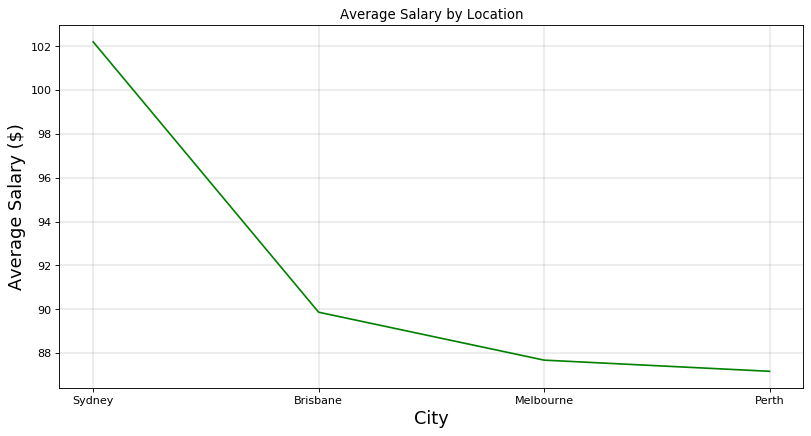

In [106]:
plot_linegraph(salary_by_location, "City", "Average Salary ($)", "Average Salary by Location")

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


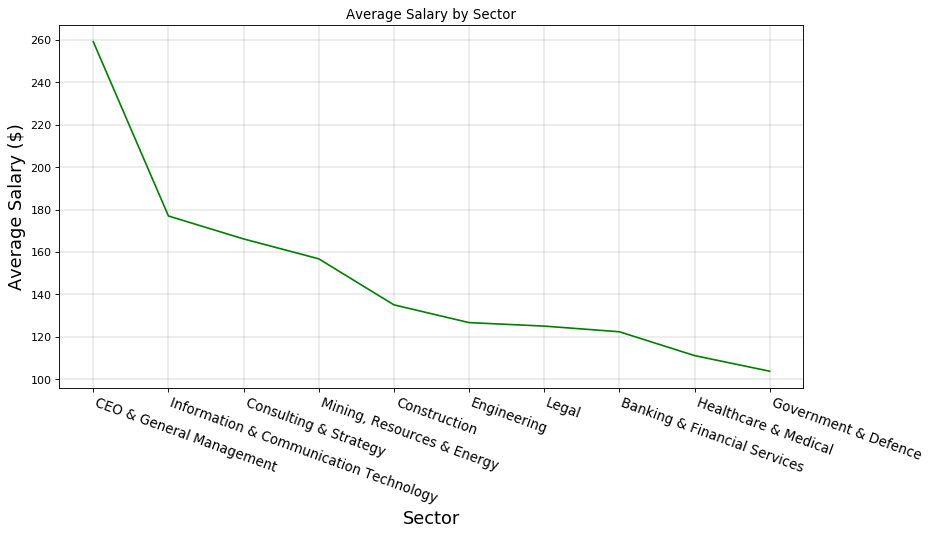

In [108]:
plot_linegraph(salary_by_classification, "Sector", "Average Salary ($)", "Average Salary by Sector", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


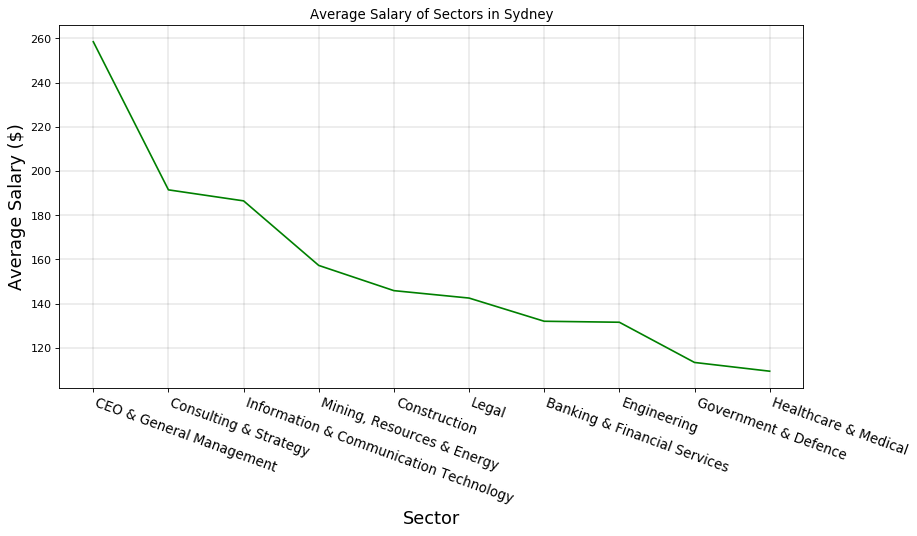

In [113]:
sydney_classification = df[df['Location']=='Sydney'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Sydney", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


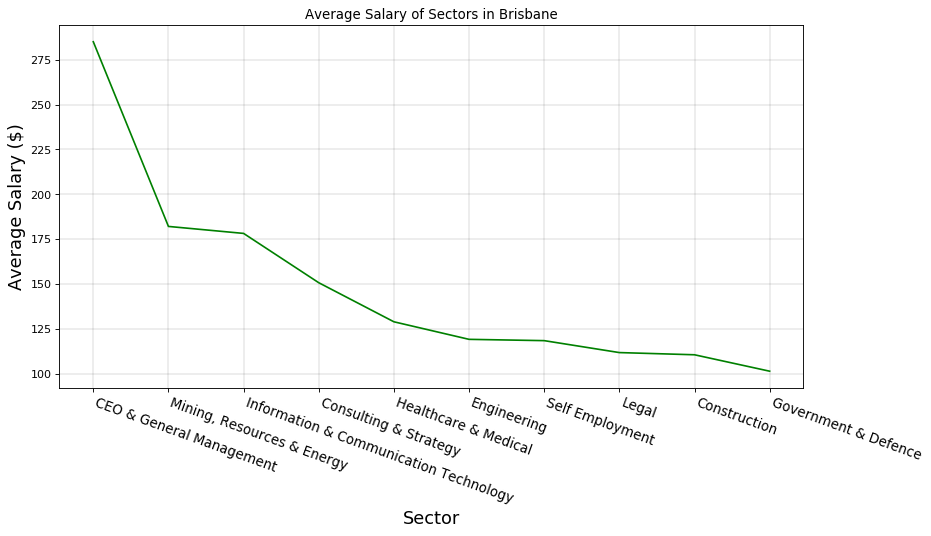

In [115]:
sydney_classification = df[df['Location']=='Brisbane'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Brisbane", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


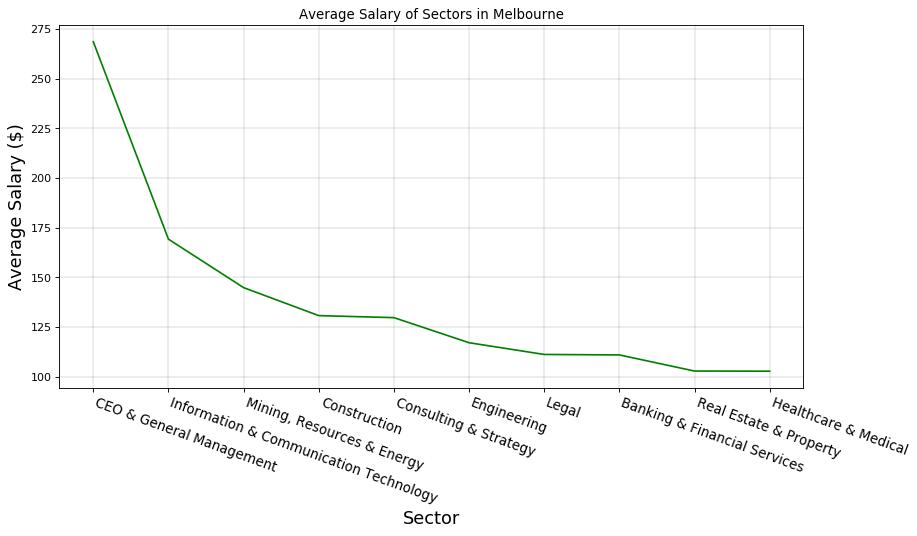

In [116]:
sydney_classification = df[df['Location']=='Melbourne'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Melbourne", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


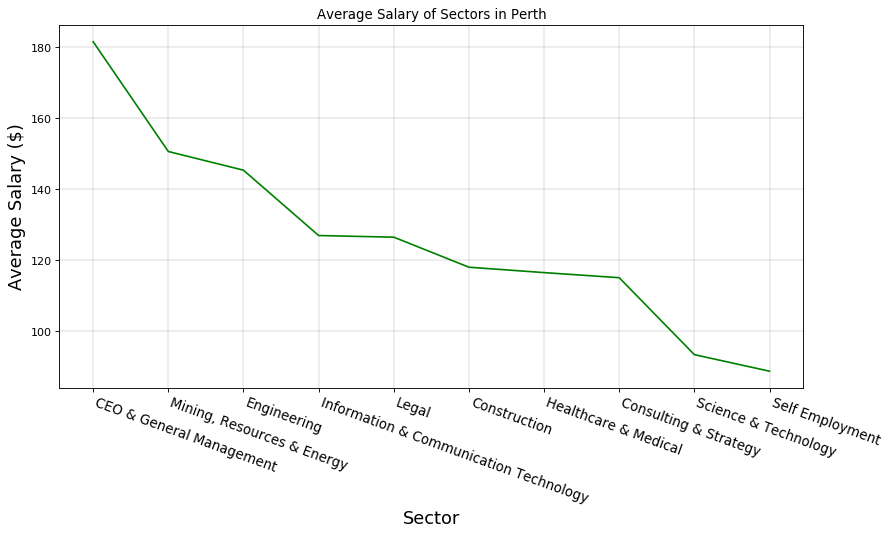

In [117]:
sydney_classification = df[df['Location']=='Perth'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Perth", rotate_x_axis=True)

In [141]:
cities = ['Sydney', 'Brisbane', 'Melbourne', 'Perth']
job_popularity = [dict(), dict(), dict(), dict()]
for i in range(0,len(cities)):
    job_popularity[cities[i]][] len(df[df['Location']==cities[i]])
market_size_series = pd.Series(market_size)

In [678]:
plot_bargraph(market_size_series, "City", "Jobs Listed", "Market Share by Locaion", rotate_x_axis=False)

NameError: name 'market_size_series' is not defined

In [142]:
# sydney_classification = df.groupby('Location')['Classification']

In [47]:
cities = ['Brisbane', 'Sydney', 'Melbourne', 'Perth']
hottest_jobs = []
for c in cities:
    s = (df[df['Location']==c].groupby('Classification')['Id'].count())
    hottest_jobs.append(s)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


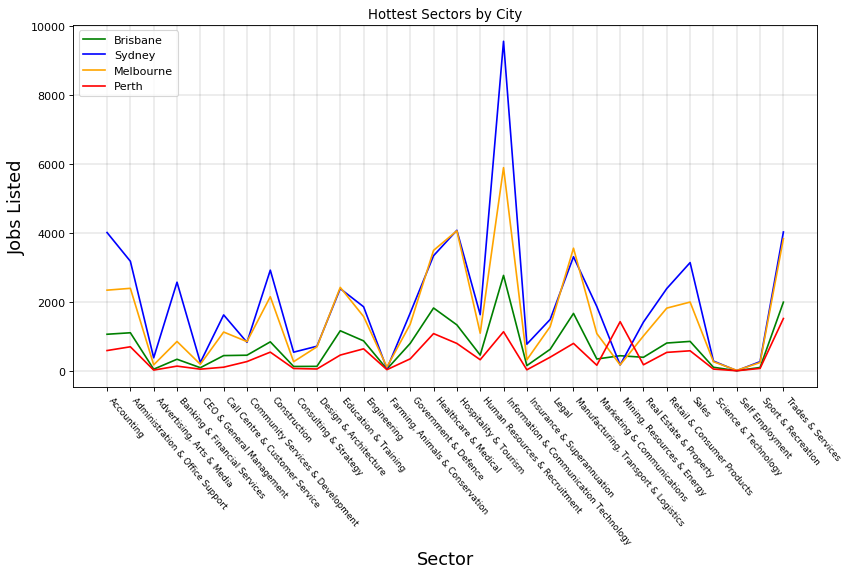

In [54]:
colors = ['green', 'blue', 'orange', 'red']
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
series = None
for i in range(0,len(hottest_jobs)):
    series = hottest_jobs[i]
    plt.plot(series, color=colors[i], label=cities[i])
plt.title("Hottest Sectors by City")
ax = plt.subplot()
ax.set_xlabel("Sector", fontsize='16')
ax.set_ylabel("Jobs Listed", fontsize='16')
ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xticklabels(rotation = (310), fontsize = 8, va='top', ha='left', labels=series.index)
ax.legend(loc="upper left")
plt.show()

In [59]:
for i in range(0,len(cities)):
    print("\n\n-- Hottest Sectors in "+cities[i]+" --")
    print(hottest_jobs[i].nlargest(5))



-- Hottest Sectors in Brisbane --
Classification
Information & Communication Technology    2768
Trades & Services                         1993
Healthcare & Medical                      1824
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1335
Name: Id, dtype: int64


-- Hottest Sectors in Sydney --
Classification
Information & Communication Technology    9548
Hospitality & Tourism                     4074
Trades & Services                         4026
Accounting                                4010
Healthcare & Medical                      3339
Name: Id, dtype: int64


-- Hottest Sectors in Melbourne --
Classification
Information & Communication Technology    5889
Hospitality & Tourism                     4060
Trades & Services                         3831
Manufacturing, Transport & Logistics      3556
Healthcare & Medical                      3493
Name: Id, dtype: int64


-- Hottest Sectors in Perth --
Classification
Trades & Services         

In [133]:
df[df['HighestSalary']== 999]

Id  \
22979                                            37399499   
22980                                            37398700   
22981                                            37398465   
22984                                            37397930   
22986                                            37400016   
22987                                            37400001   
22989                                            37400030   
22990                                            37399708   
22991                                            37399694   
22992                                            37399663   
22995                                            37398653   
22998                                            37398510   
22999                                            37399030   
23000                                            37400000   
23001                                            37399965   
23002                                            37399875   
23005                                            37399707   
23006                                            37399614   
23007                                            37399583   
23010                                            37399434   
23011                                            37399402   
23013                                            37399231   
23018                                            37398453   
23019                                            37398000   
23021                                            37397920   
23022                                            37399608   
23023                                            37397792   
23025                                            37397669   
23026                                            37397668   
23028                                            37397552   
...                                                   ...   
197166  37830018&searchrequesttoken=02a95245-f94f-4ad6...   
197167  37829965&searchrequesttoken=02a95245-f94f-4ad6...   
197168  37829965&searchrequesttoken=9383958b-7a46-424e...   
197170  37829936&searchrequesttoken=9383958b-7a46-424e...   
197171  37829893&searchrequesttoken=9383958b-7a46-424e...   
197172  37829885&searchrequesttoken=9383958b-7a46-424e...   
197173  37829884&searchrequesttoken=9383958b-7a46-424e...   
197174  37829862&searchrequesttoken=9383958b-7a46-424e...   
197176  37829762&searchrequesttoken=9383958b-7a46-424e...   
197178  37829684&searchrequesttoken=9383958b-7a46-424e...   
197179  37829663&searchrequesttoken=9383958b-7a46-424e...   
197180  37829531&searchrequesttoken=9383958b-7a46-424e...   
197181  37829457&searchrequesttoken=9383958b-7a46-424e...   
197185  37829374&searchrequesttoken=9383958b-7a46-424e...   
197191  37829171&searchrequesttoken=8b903ecf-4f51-4a20...   
197193  37829035&searchrequesttoken=8b903ecf-4f51-4a20...   
197194  37828994&searchrequesttoken=8b903ecf-4f51-4a20...   
197195  37828961&searchrequesttoken=8b903ecf-4f51-4a20...   
197196  37828958&searchrequesttoken=8b903ecf-4f51-4a20...   
197200  37828752&searchrequesttoken=8b903ecf-4f51-4a20...   
197201  37828630&searchrequesttoken=8b903ecf-4f51-4a20...   
197204  37828604&searchrequesttoken=8b903ecf-4f51-4a20...   
197205  37597683&searchrequesttoken=8b903ecf-4f51-4a20...   
197209  37828490&searchrequesttoken=5f3040c0-7469-48cc...   
197213  37828447&searchrequesttoken=5f3040c0-7469-48cc...   
197216  37828407&searchrequesttoken=5f3040c0-7469-48cc...   
197217  37828375&searchrequesttoken=5f3040c0-7469-48cc...   
197218  37828374&searchrequesttoken=5f3040c0-7469-48cc...   
197222  37828315&searchrequesttoken=5f3040c0-7469-48cc...   
197225  37828093&searchrequesttoken=5f3040c0-7469-48cc...   

                                                    Title  \
22979                                     General Manager   
22980                             Chief Operating Officer   
22981                                   Managing Director   
22984                       

In [172]:
#min_sal = (df.groupby('Classification'))['LowestSalary'].nsmallest(1)
min_sal = df[df['JobType']=='Full Time'].groupby('Classification').min(level='LowestSalary')['LowestSalary']
max_sal = df[df['JobType']=='Full Time'].groupby('Classification').max(level='HighestSalary')['HighestSalary']
print(min_sal)
print(max_sal)

Classification
Accounting                                30
Administration & Office Support           30
Advertising, Arts & Media                 30
Banking & Financial Services              30
CEO & General Management                  30
Call Centre & Customer Service            30
Community Services & Development          30
Construction                              30
Consulting & Strategy                     30
Design & Architecture                     30
Education & Training                      30
Engineering                               30
Farming, Animals & Conservation           30
Government & Defence                      30
Healthcare & Medical                      30
Hospitality & Tourism                     30
Human Resources & Recruitment             30
Information & Communication Technology    30
Insurance & Superannuation                30
Legal                                     30
Manufacturing, Transport & Logistics      30
Marketing & Communications              

In [761]:
labels = []
min_vals = []
max_vals = []
for v in min_sal.index:
    labels.append(v[0])
    min_vals.append(v[1])
    print(v[1])
i = 0
print("MAX VALS")
for v in max_sal.index:
    #s = v[1]-min_vals[i]
    max_vals.append(s)
    print(s)
    i+=1

c
d
d
a
E
a
o
o
o
e
d
n
a
o
e
o
u
n
n
e
a
a
i
e
e
a
c
e
p
r
MAX VALS
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Technology
Information & Communication Techno

In [553]:
months = list(range(1,12+1))
month_posted = df.groupby('Date')['AverageSalary'].count()

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


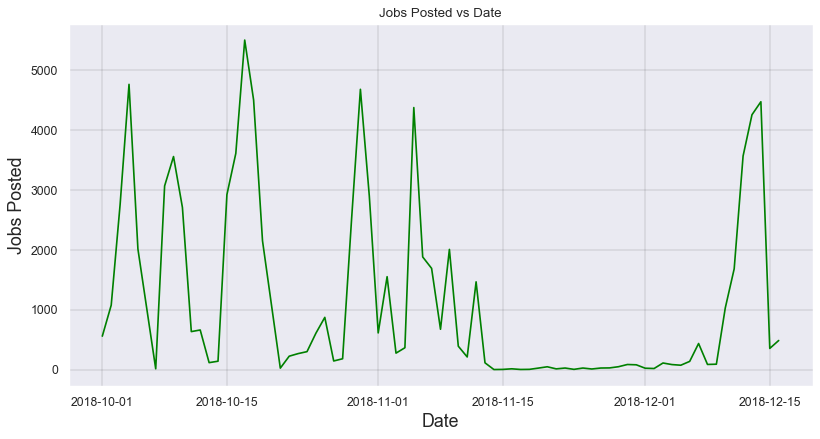

In [573]:
plot_linegraph(month_posted, "Date", "Jobs Posted", "Jobs Posted vs Date", rotate_x_axis=False)

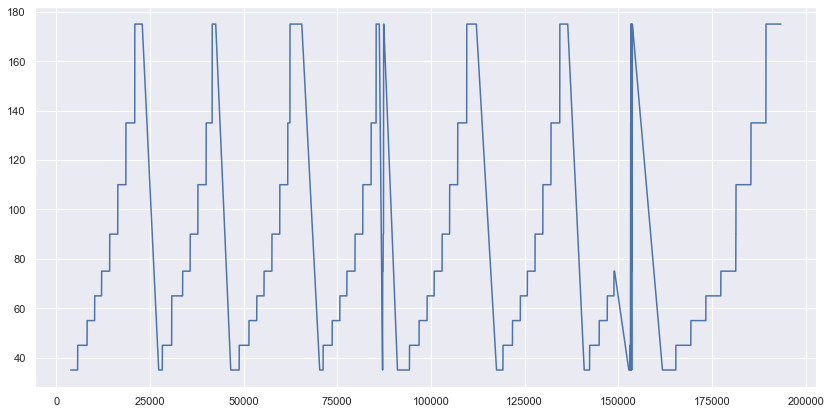

In [555]:
plt.plot(df['AverageSalary'])

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


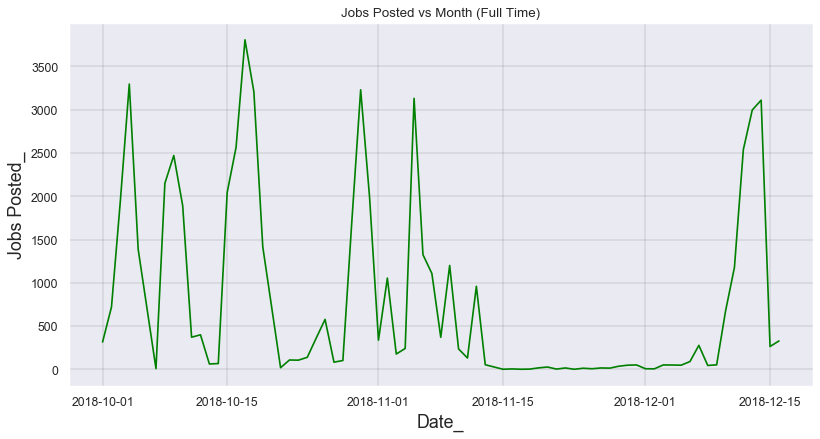

In [556]:
date_post = df[df['JobType']=='Full Time'].groupby('Date')['Id'].count()
plot_linegraph(date_post, "Date_", "Jobs Posted_", "Jobs Posted vs Month (Full Time)", rotate_x_axis=False)

In [540]:
sectors = df.groupby('Classification')['Classification'].count().index
subsector_dict = dict()
for s in sectors:
    subsectors = df[df['Classification']==s].groupby('SubClassification')['Id'].count()
    subsector_salary = df[df['Classification']==s].groupby('SubClassification')['AverageSalary'].mean()
    subsector_dict[s] = [subsectors.index, subsectors.values / 5, subsector_salary.values]

In [337]:
def plot_bargraph_custom(series, xlabel, ylabel, title, c='green', rotate_x_axis=False):
    fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    objects = series[0]
    y_pos = np.arange(len(objects))
    performance = series[1]
    salary = series[2]
    plt.bar(y_pos, performance, align='center', alpha=0.5, color='red')
    #plt.bar(y_pos, salary, align='center', alpha=0.5, color=c)
    plt.plot(salary,color='black')
    plt.xticks(y_pos, objects)
    plt.title(title,fontsize='20')
    plt.xlabel(xlabel, fontsize='16')
    plt.ylabel(ylabel, fontsize='16')
    ax = plt.subplot()
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label='Jobs Listed (20% of true value)')
    black_patch = mpatches.Patch(color='black', label='Salary of Subsector')
    plt.legend(handles=[red_patch,black_patch])
    ax.set_xticklabels(rotation = (320), fontsize = 12, va='top', ha='left', labels=series[0])
    plt.show()

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


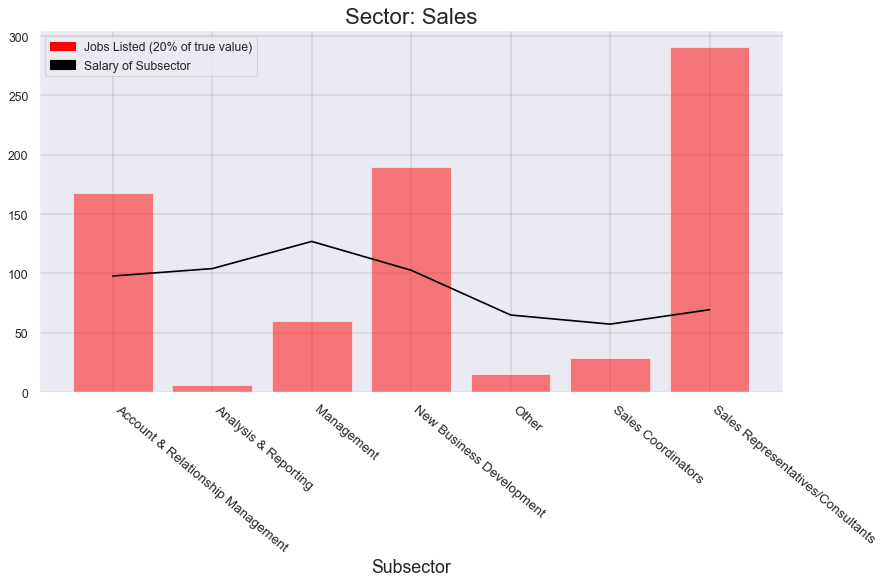

In [338]:
plot_bargraph_custom(subsector_dict['Sales'], xlabel='Subsector', ylabel='', title='Sector: Sales', c='blue', rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


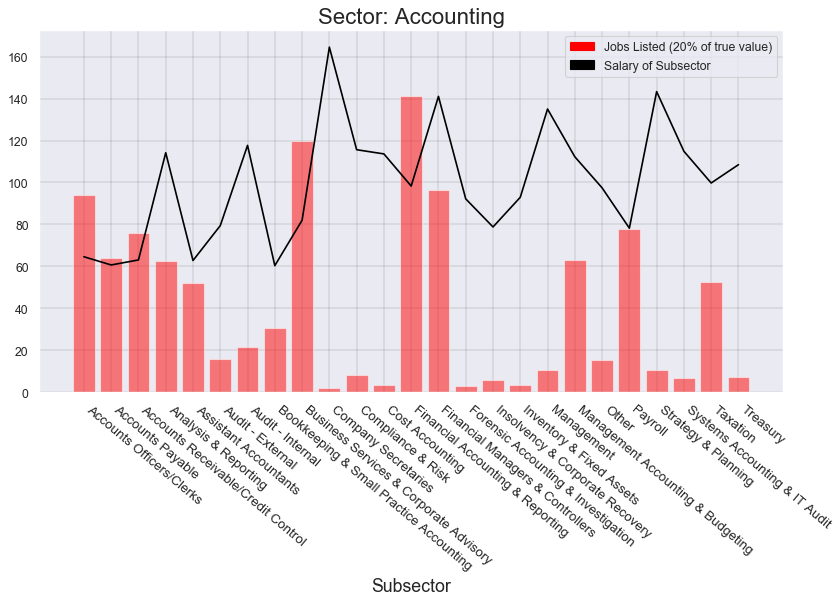

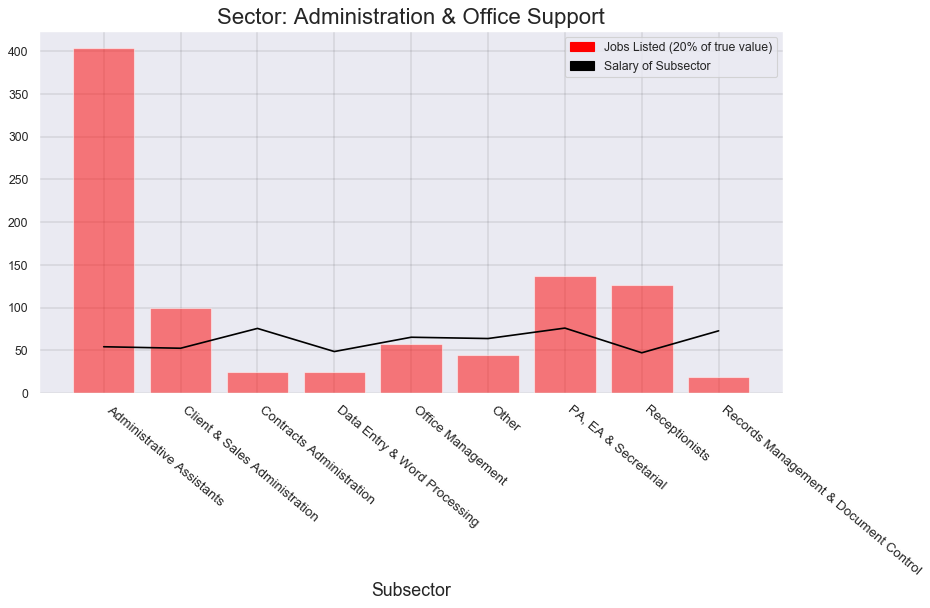

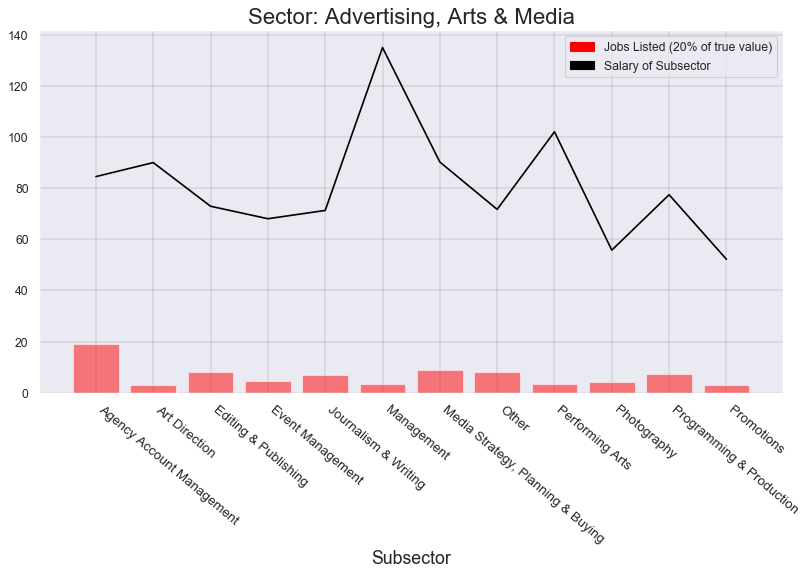

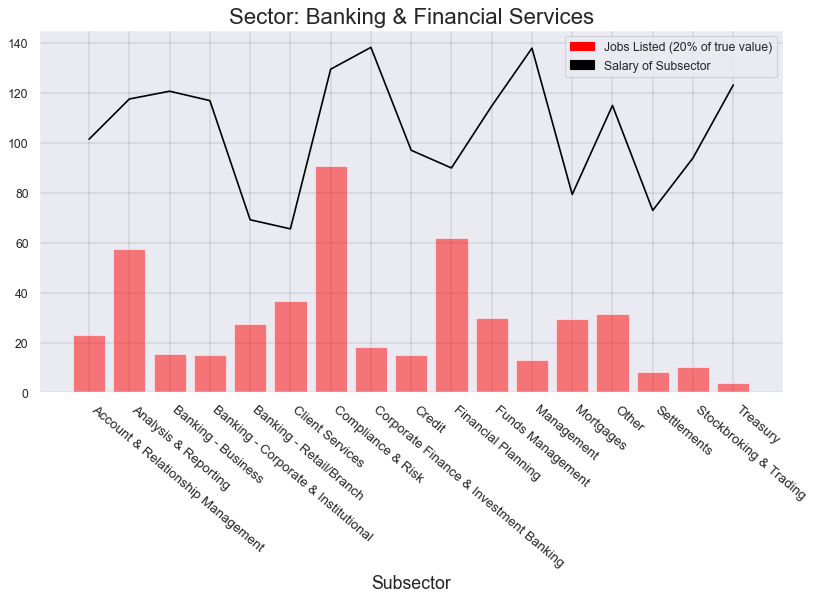

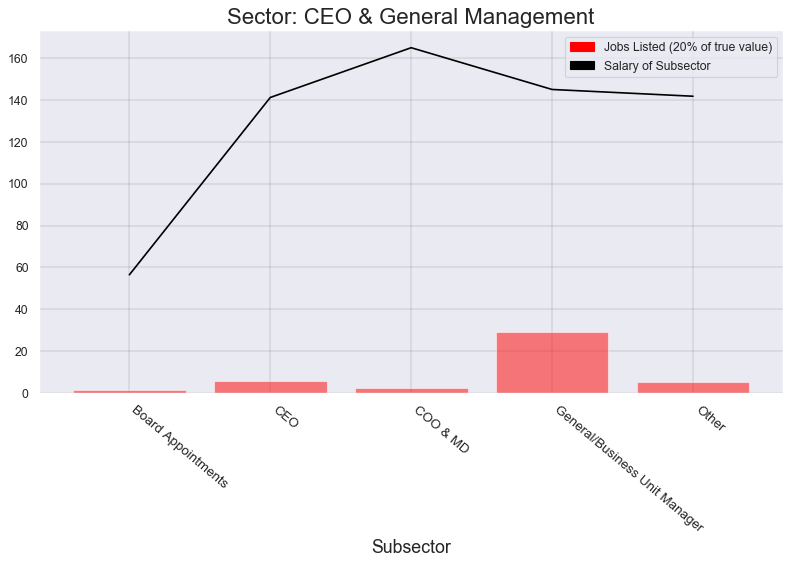

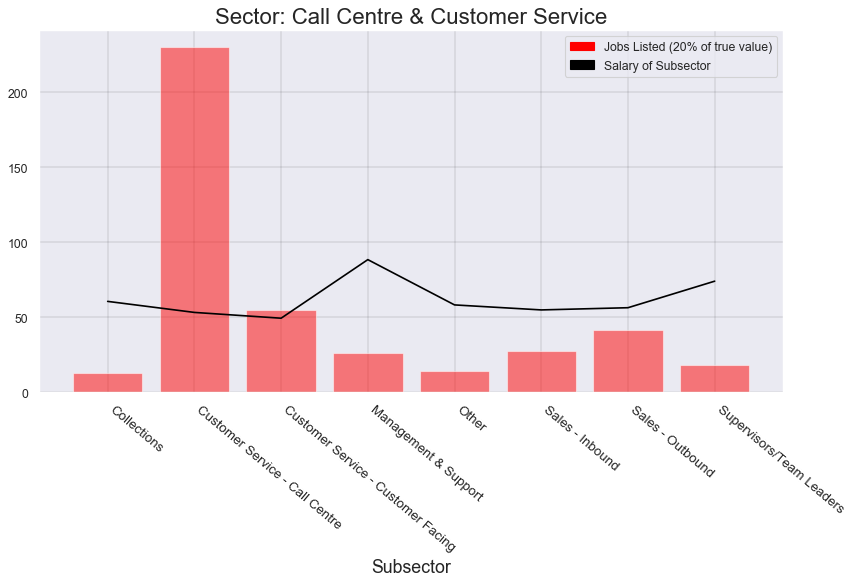

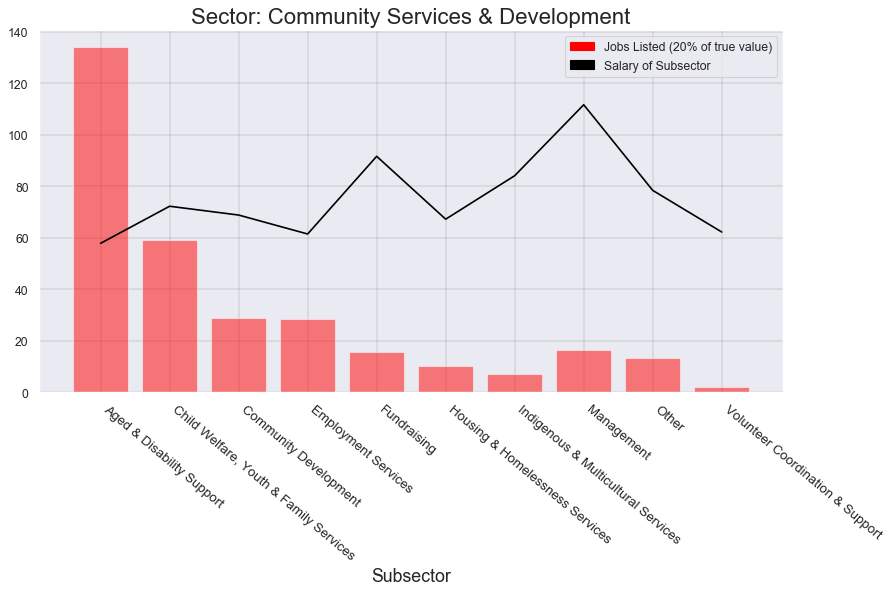

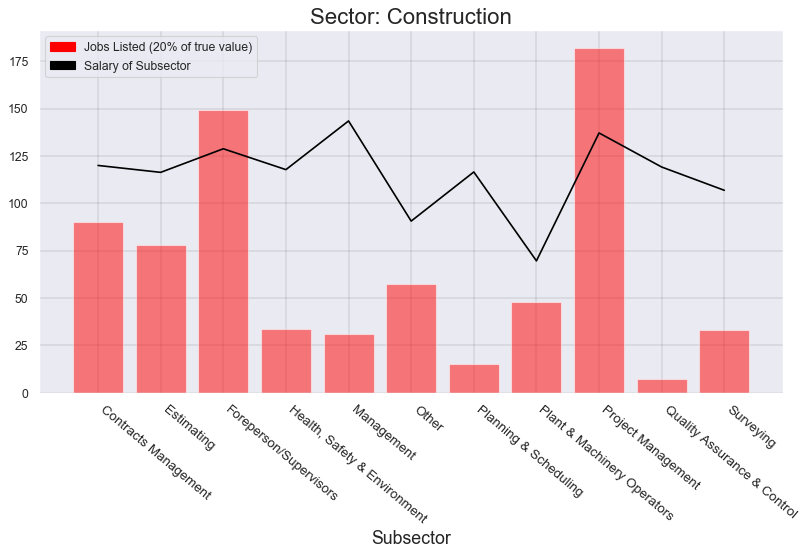

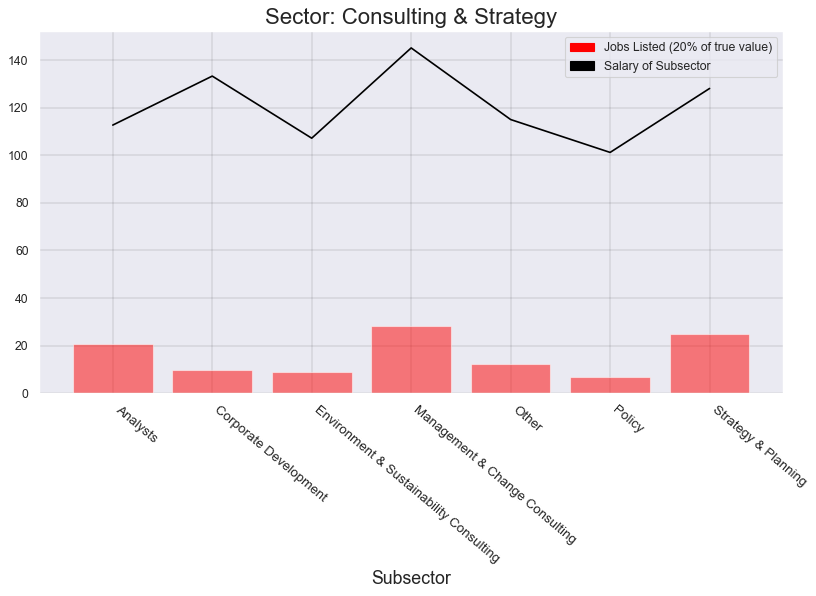

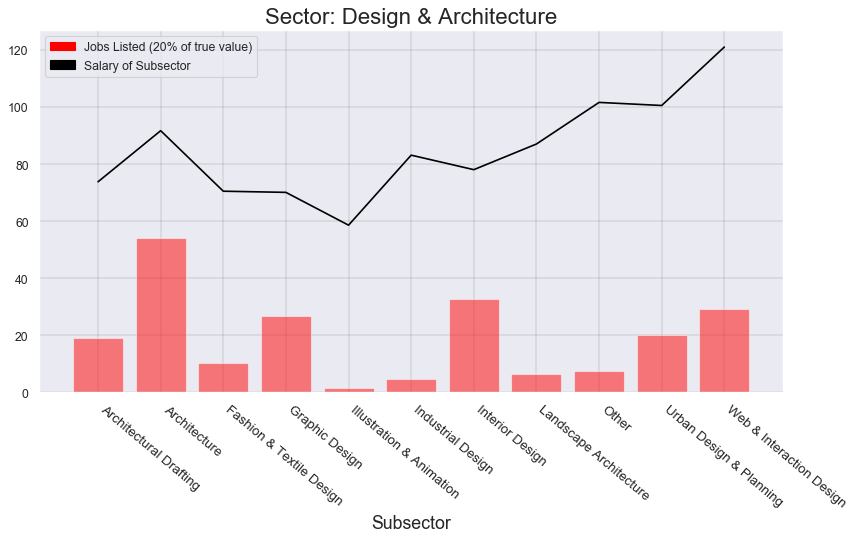

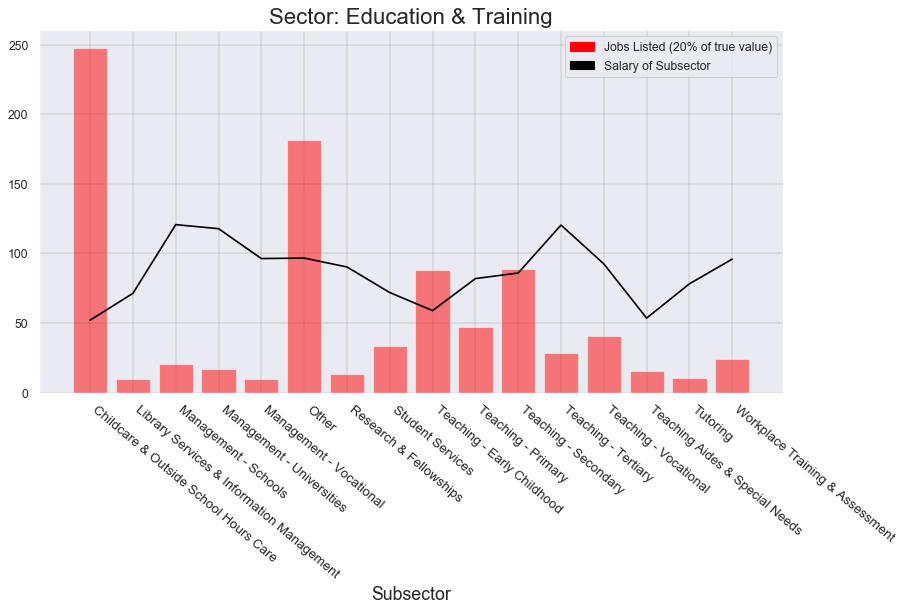

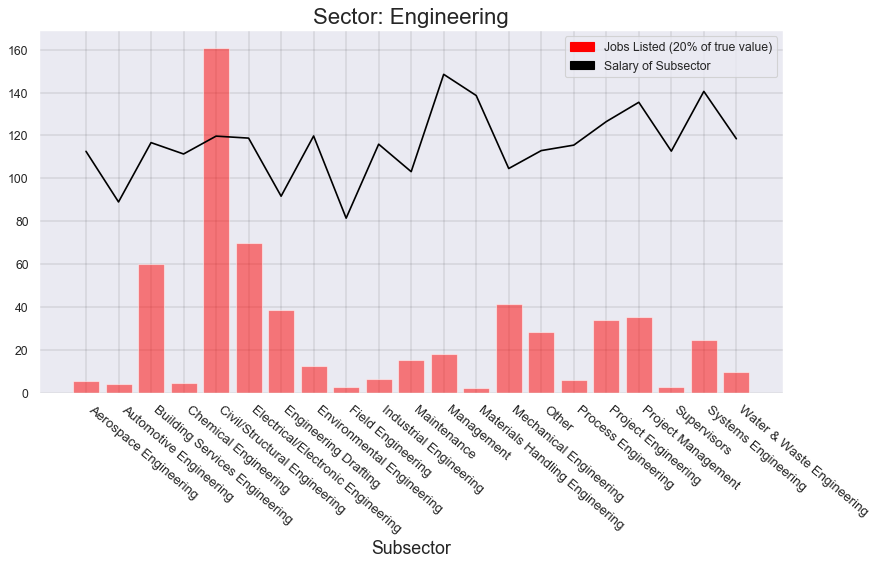

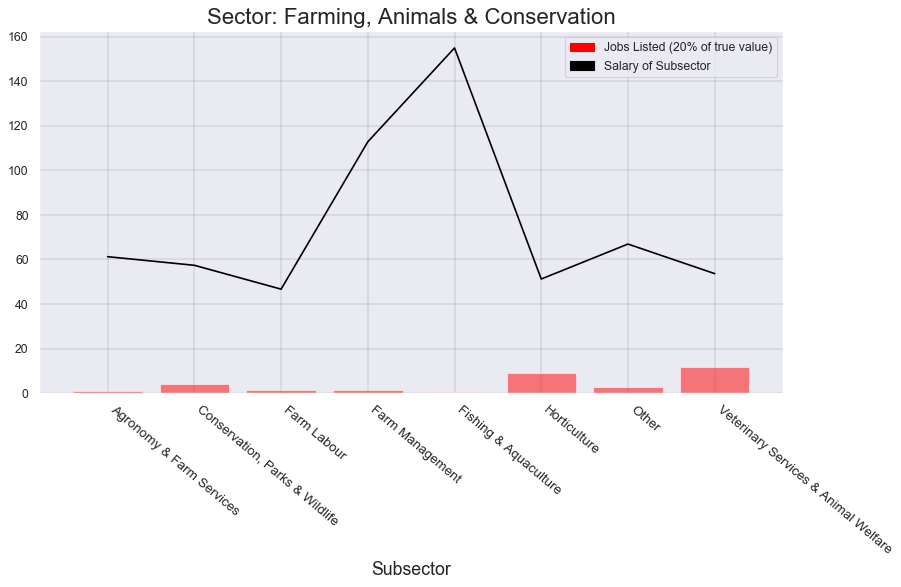

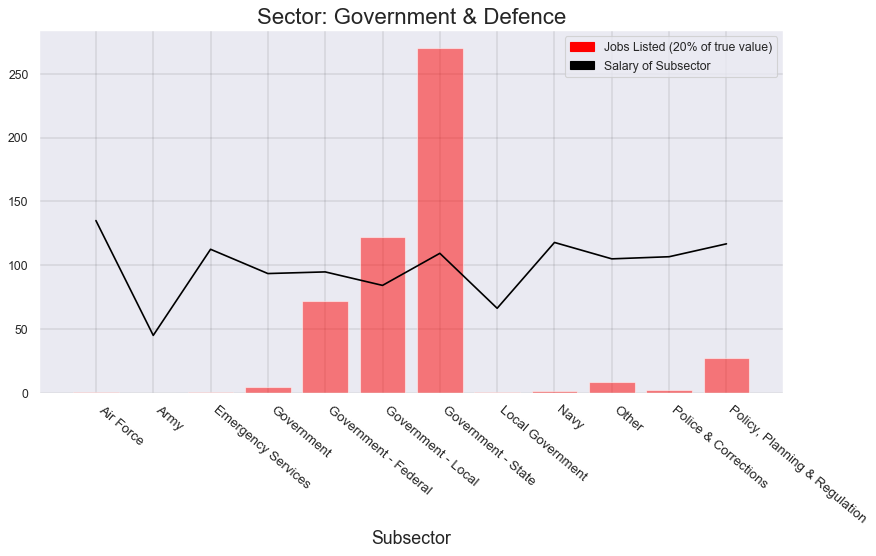

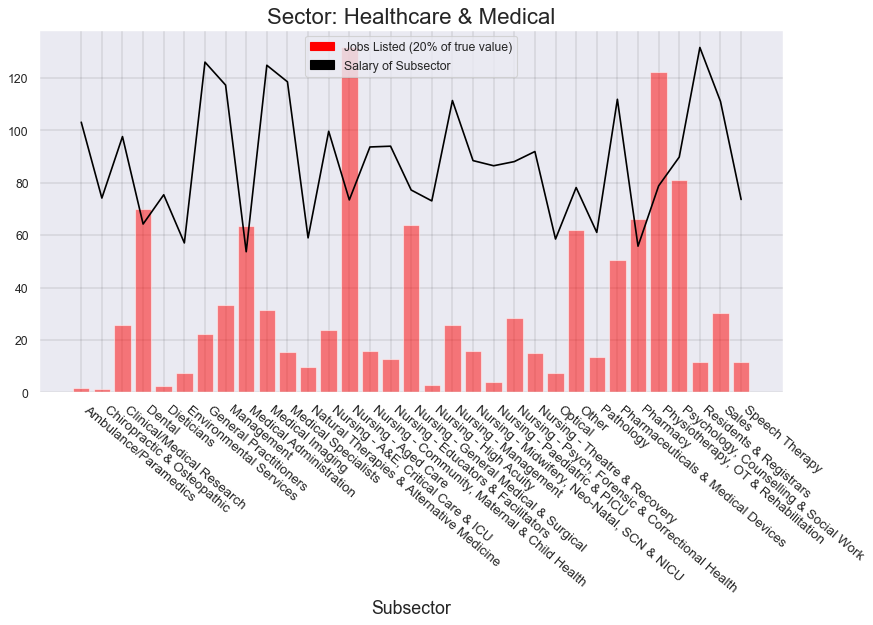

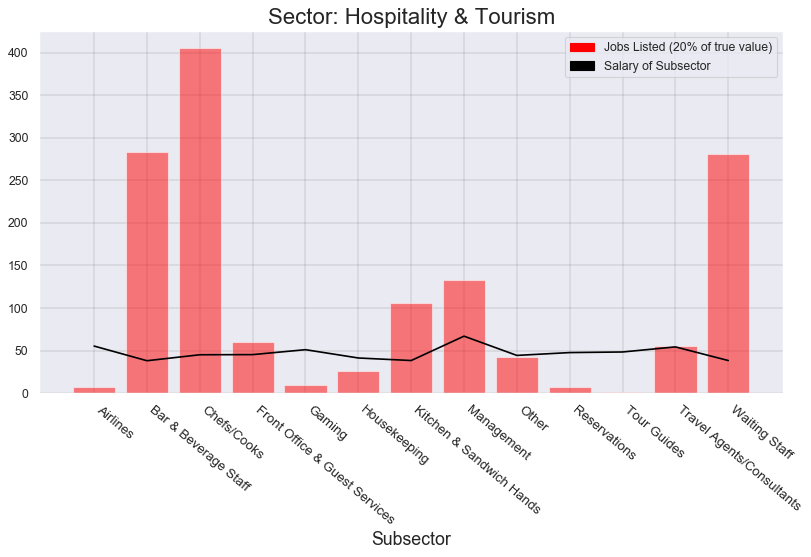

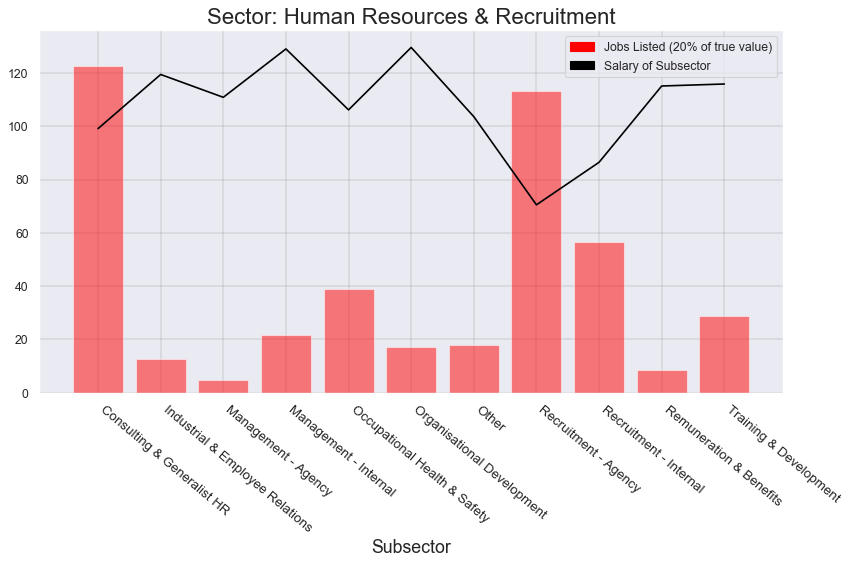

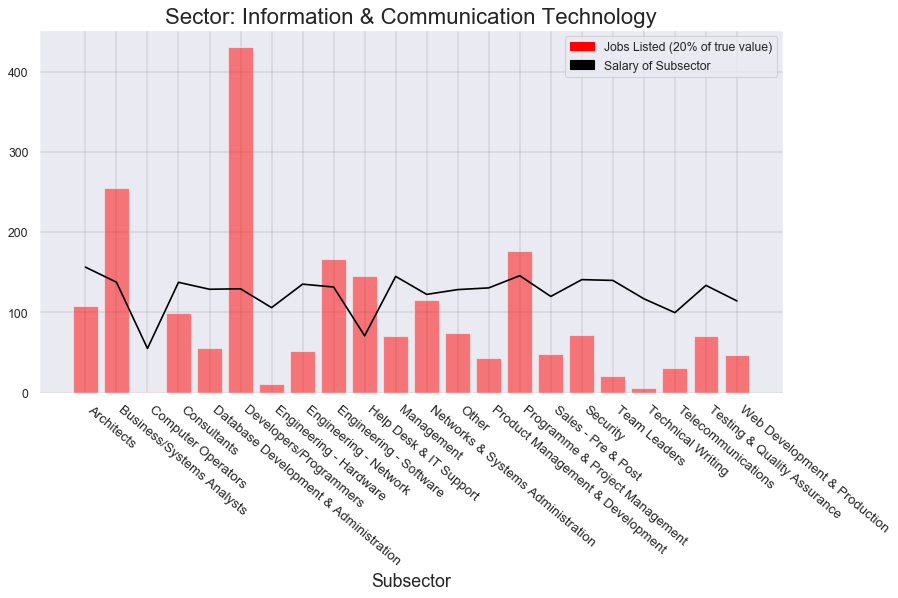

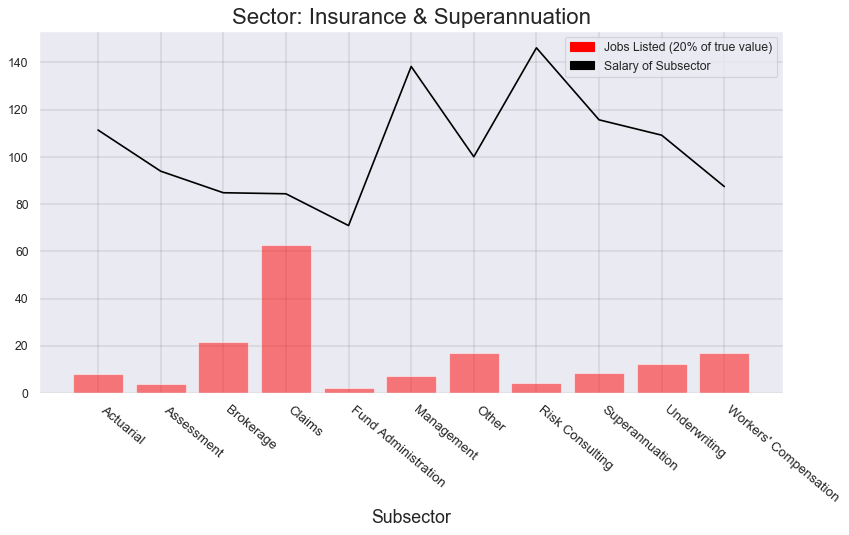

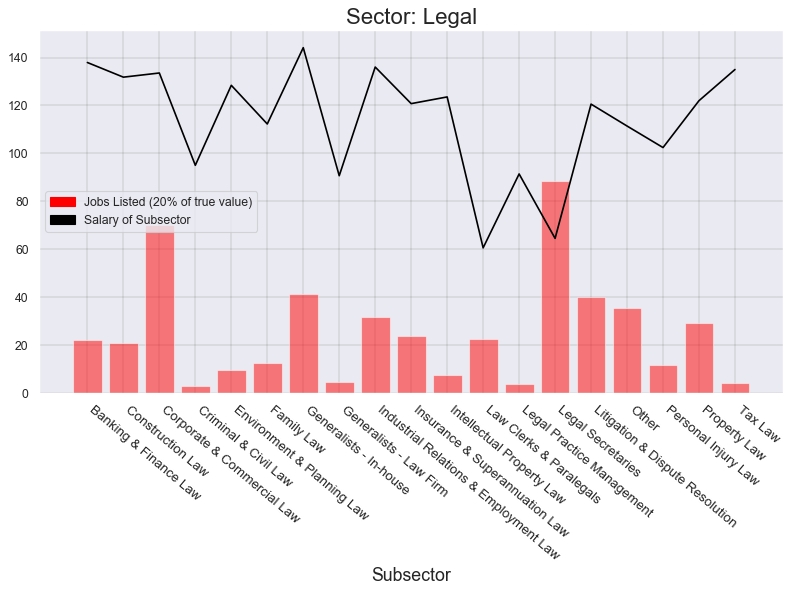

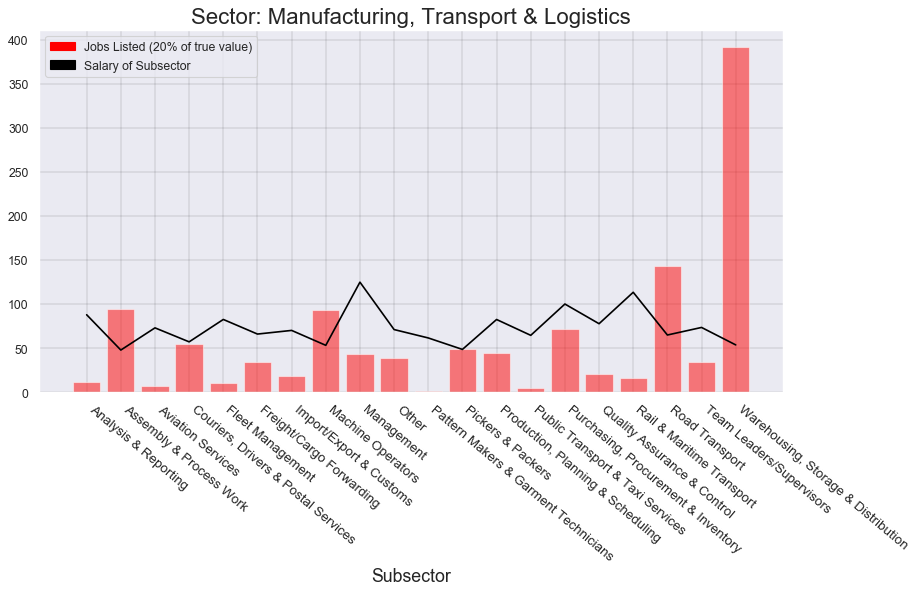

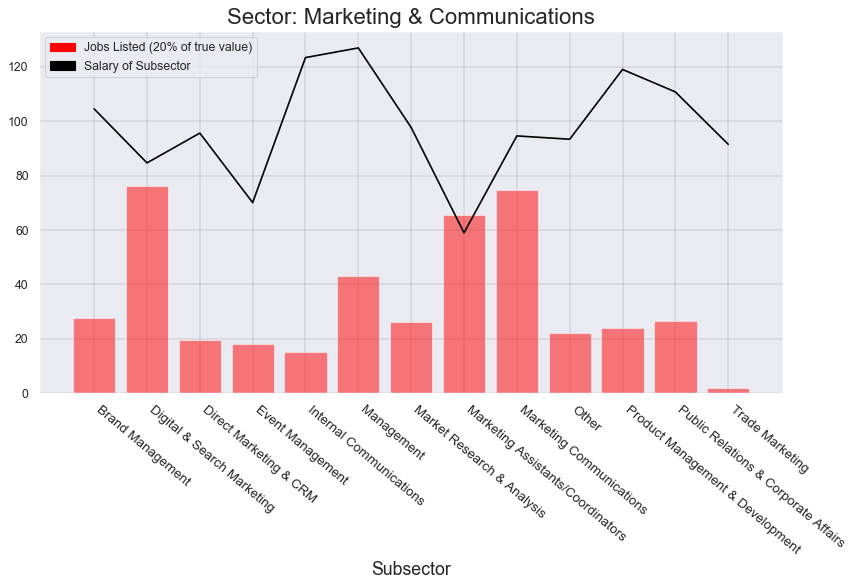

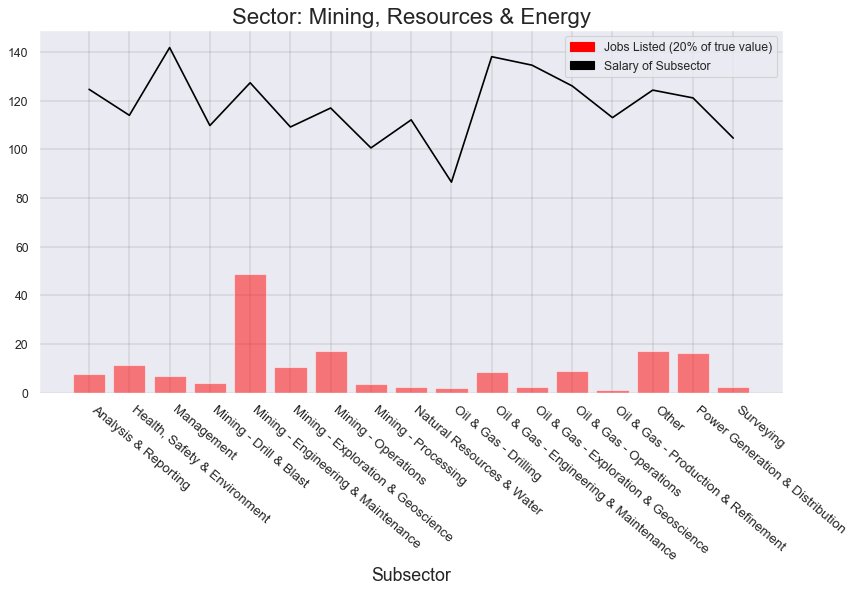

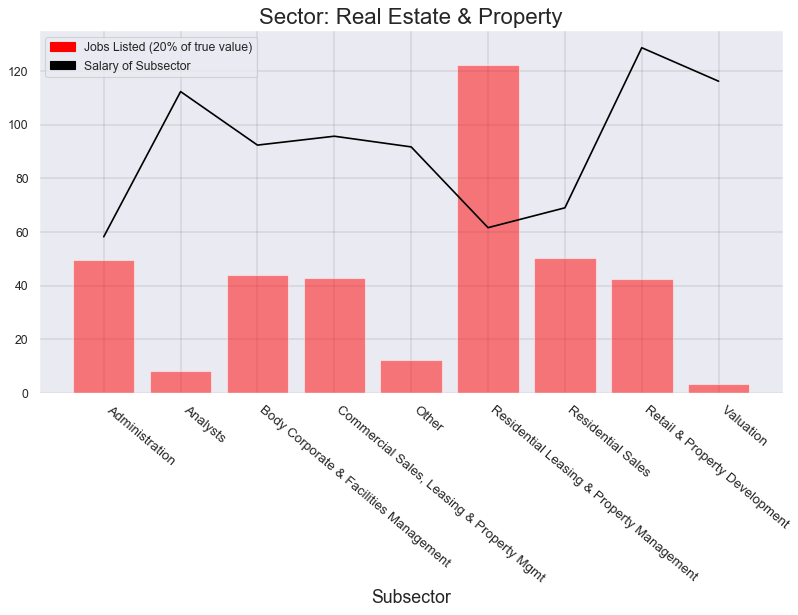

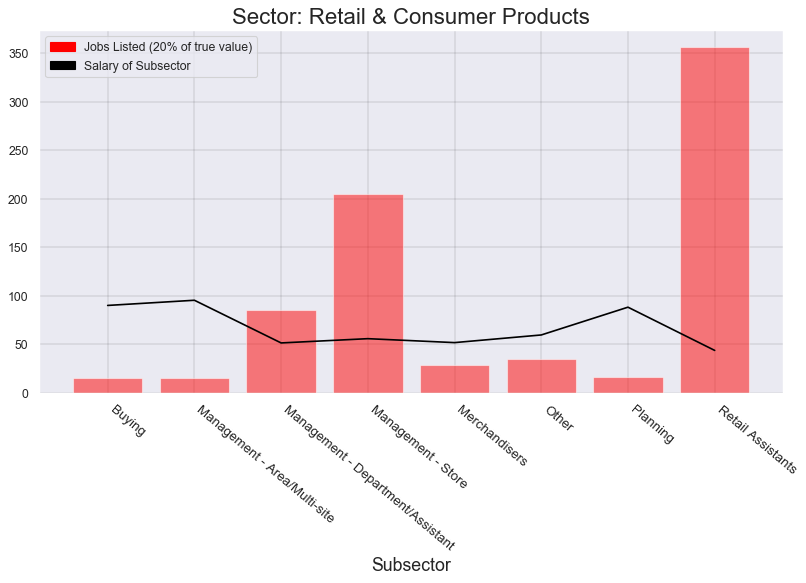

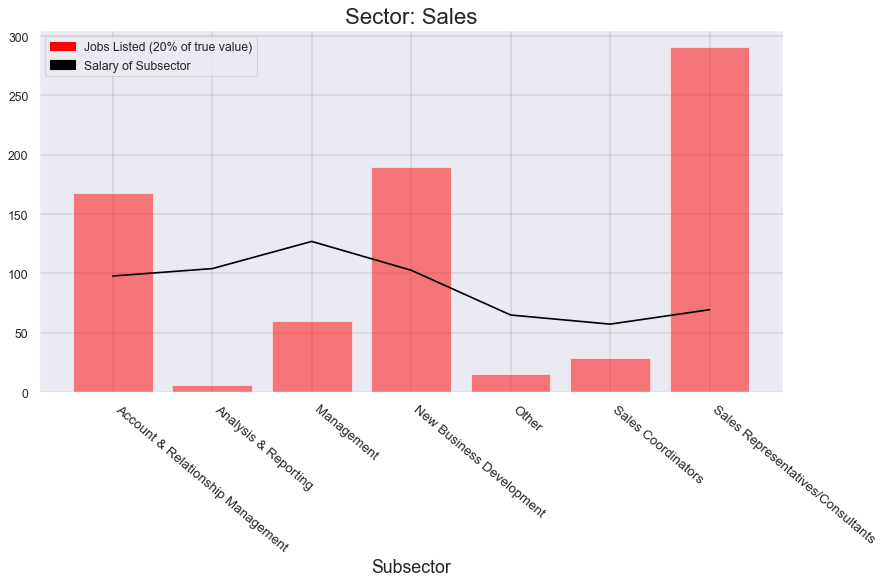

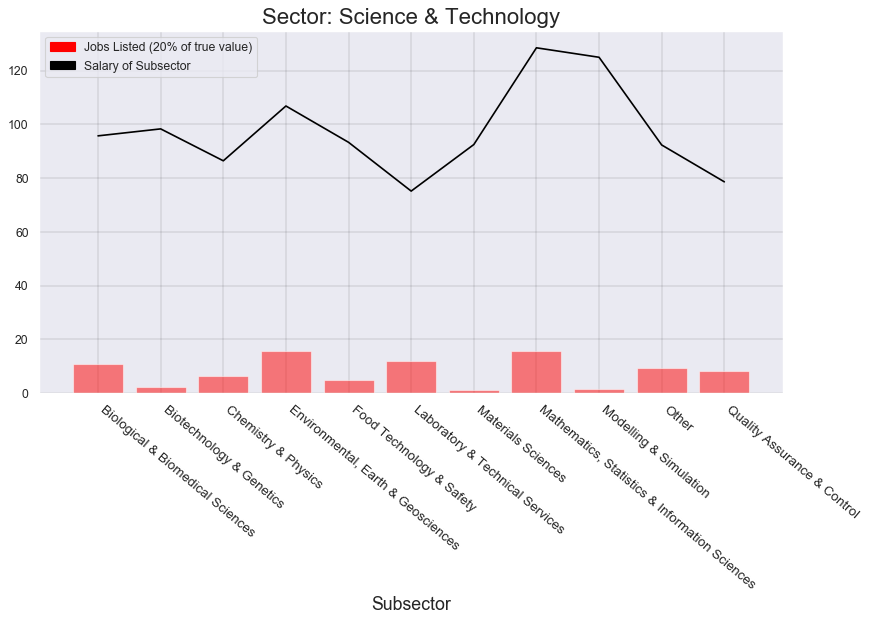

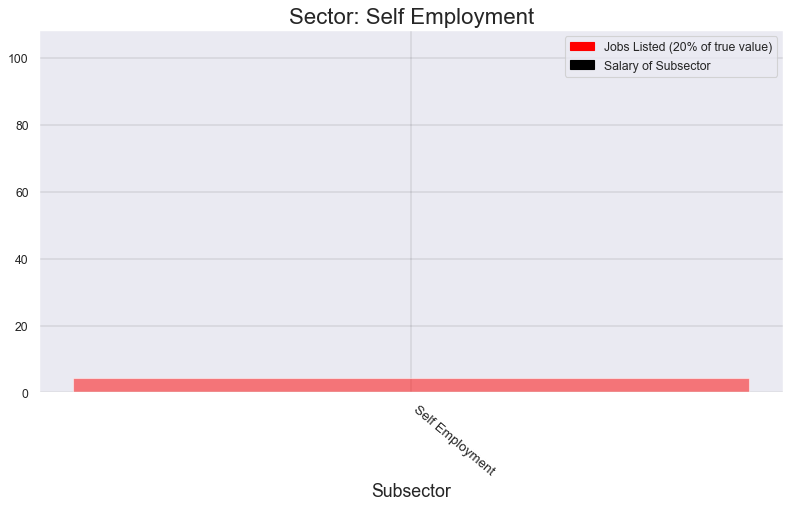

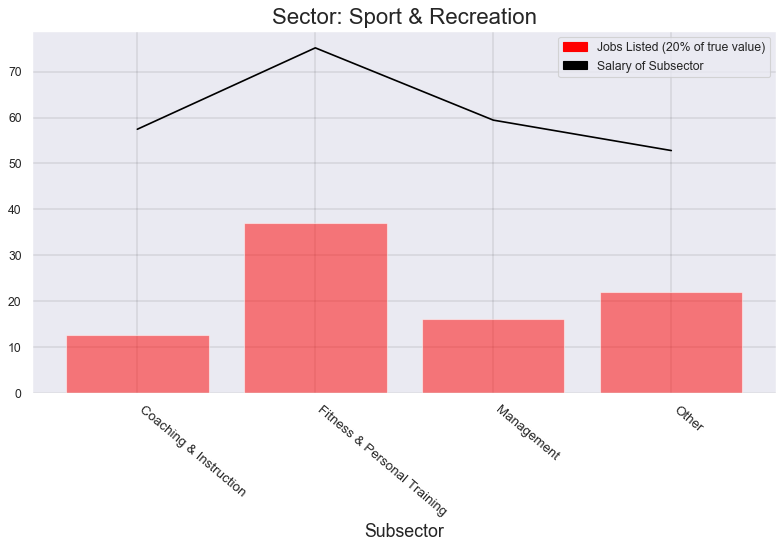

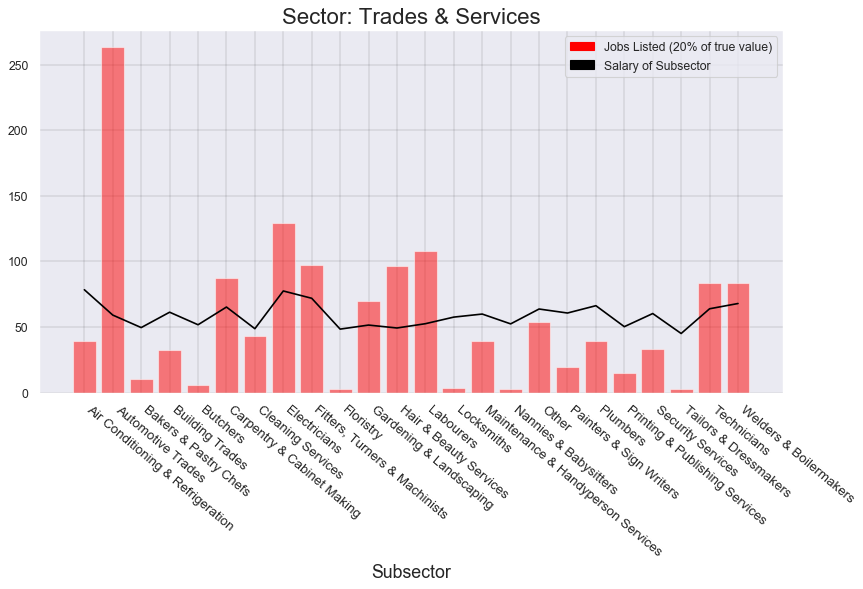

In [339]:
for s in sectors:
    plot_bargraph_custom(subsector_dict[s], xlabel='Subsector', ylabel='', title='Sector: '+str(s), c='blue', rotate_x_axis=True)

In [433]:
nltk.download('wordnet')
from nltk import ngrams, FreqDist
nltk.download('averaged_perceptron_tagger')

skilldata = {'Sector': [],'Skill': [], 'Score': []}


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pube\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pube\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [434]:
for s in sectors:
    series = (df[df['Classification']==s].groupby('Classification')['Requirement']).sum()
    word_tokens = []
    adjectives = []
    for x in series.values:
        word_tokens += nltk.word_tokenize(x)
    #for w in word_tokens:
    legal_tags = ['JJ', 'JJR', 'JJS'] #Adjective, comparative adjective, superlative adjective
    adjectives = nltk.pos_tag(word_tokens)
    adjectives = [i for i in adjectives if i[1] in legal_tags]
    #all_counts = FreqDist(ngrams(adjectives, 3))
    all_counts = FreqDist(ngrams(adjectives, 1))
    common_terms = (all_counts.most_common(6))
    for a in common_terms:
        skilldata['Sector'].append(s)
        #skilldata['Skill'].append(a[0][0][0].upper()+" "+a[0][1][0].upper()+" "+a[0][2][0].upper())
        skilldata['Skill'].append(a[0][0][0].upper())
        skilldata['Score'].append(a[1])


skilldf = pd.DataFrame (skilldata, columns = ['Sector','Skill','Score'])

In [435]:
skilldf[skilldf['Sector']=='Sales']

Sector        Skill  Score
150  Sales          NEW    307
151  Sales  EXPERIENCED    254
152  Sales        GREAT    179
153  Sales       GLOBAL    165
154  Sales     EXCITING    129
155  Sales   SUCCESSFUL    126

In [442]:
def plot_linegraph_skills(series, xlabel, ylabel, title, c='green', rotate_x_axis=False):
    fig=plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
    #plt.plot(, , color=c)
    plt.bar(series['Skill'].values, series['Score'].values, align='center', alpha=0.5, color=c)
    plt.title(title,fontsize='14')
    ax = plt.subplot()
    ax.set_xlabel(xlabel, fontsize='12')
    ax.set_ylabel(ylabel, fontsize='12')
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    if rotate_x_axis:
        ax.set_xticklabels(rotation = (0), fontsize = 9, va='top', ha='center', labels=series['Skill'].values)
    plt.show()

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


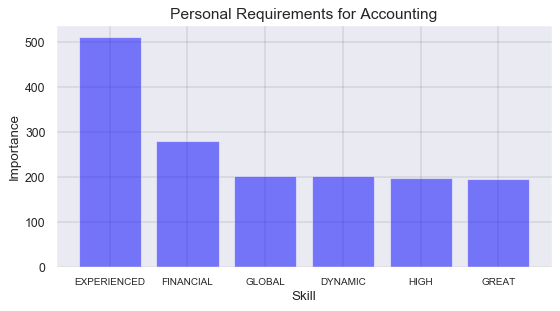

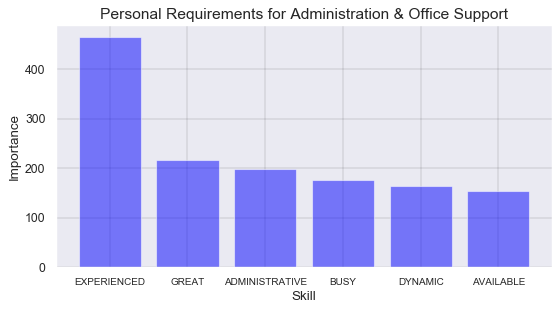

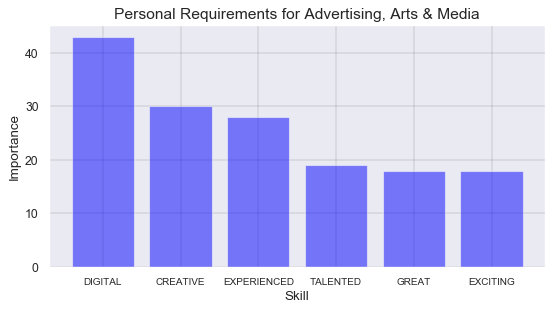

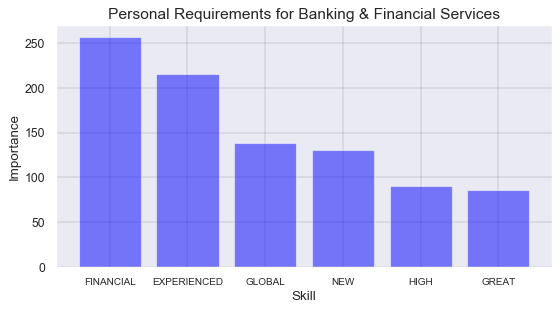

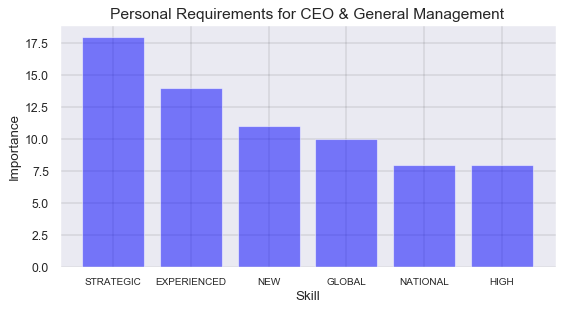

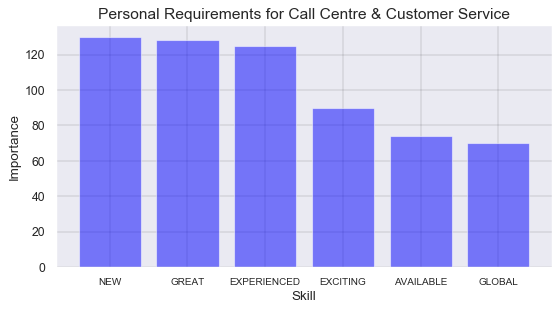

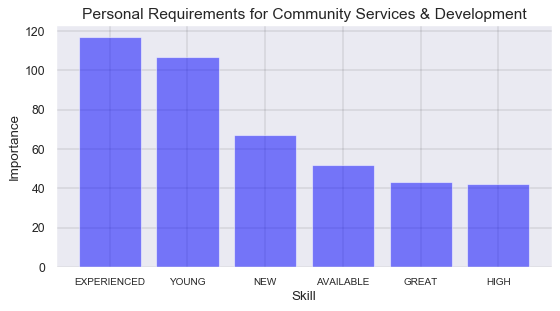

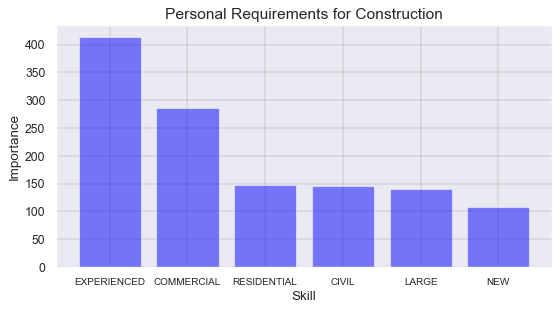

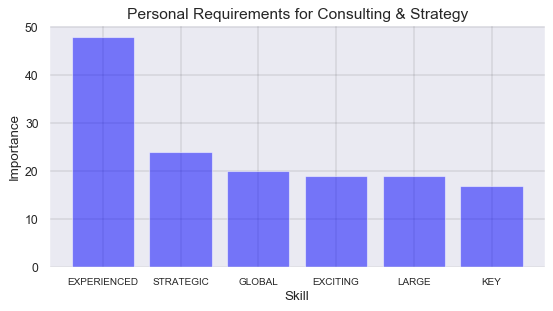

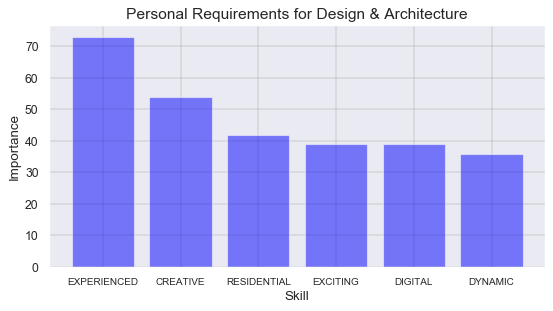

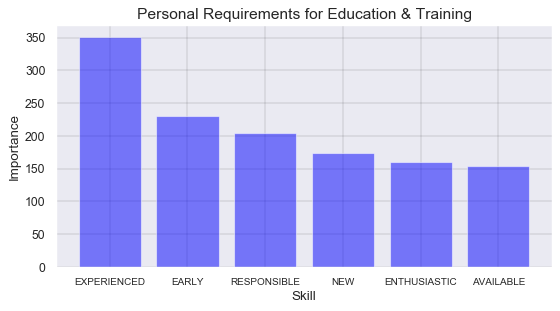

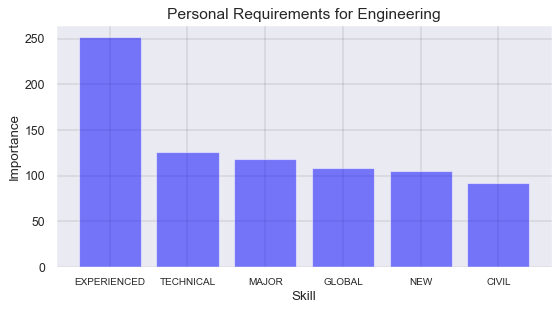

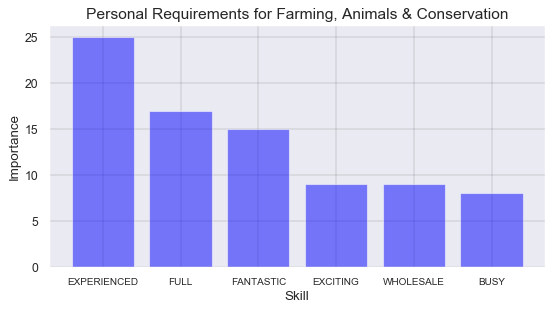

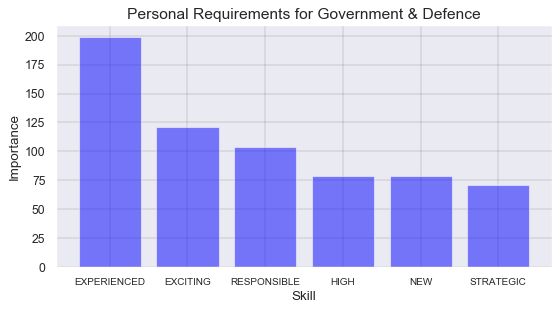

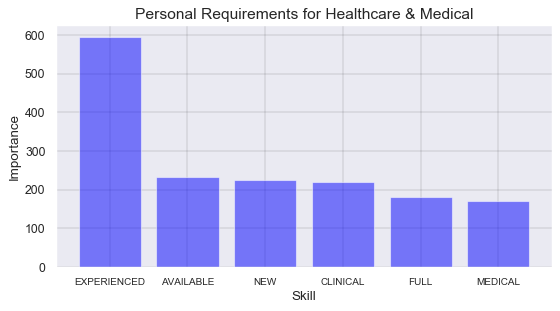

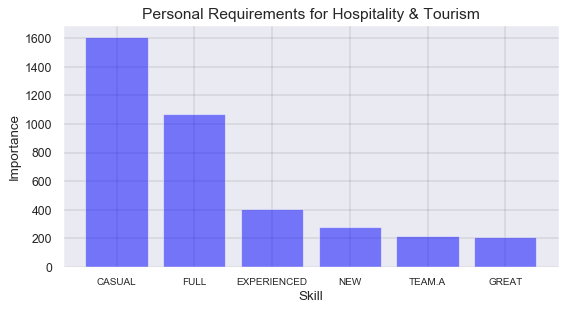

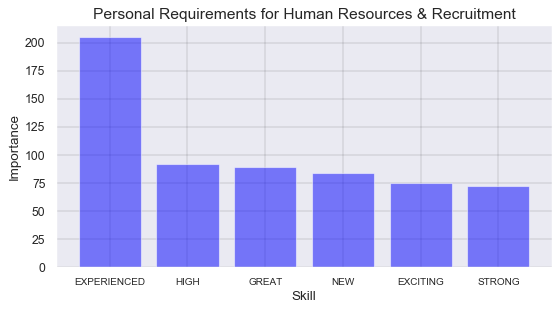

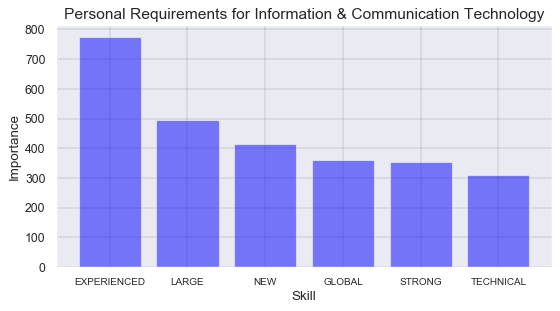

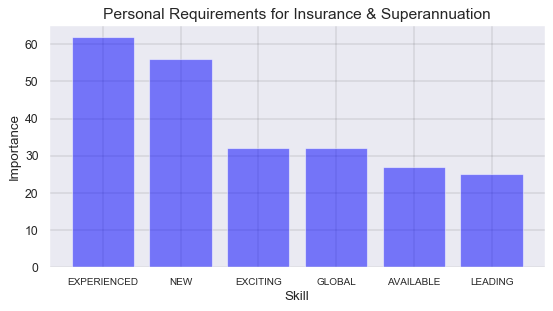

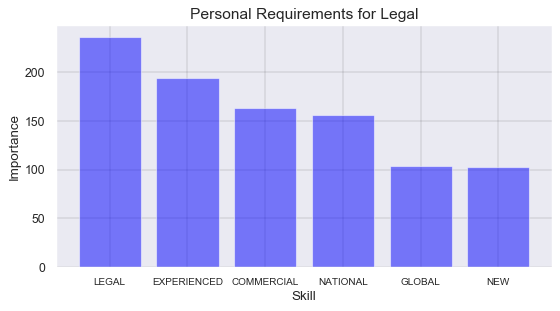

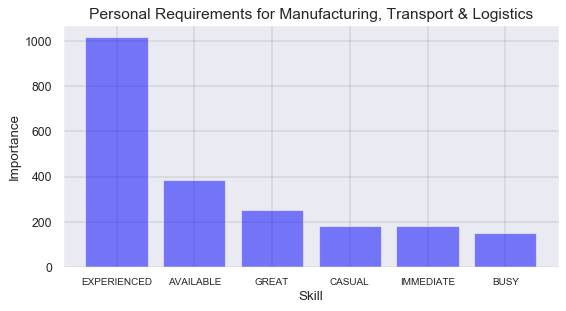

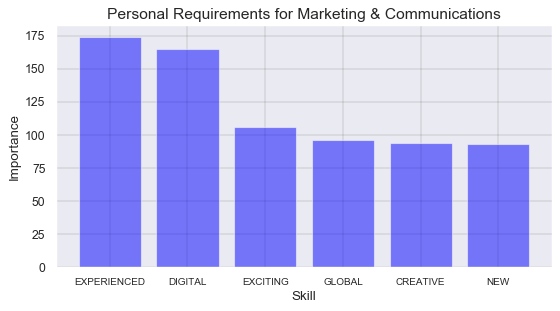

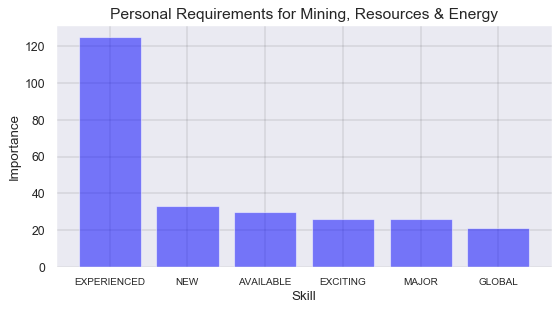

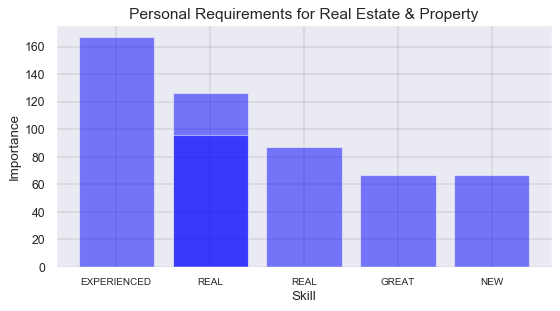

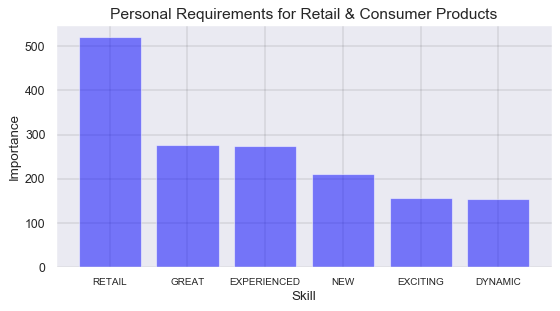

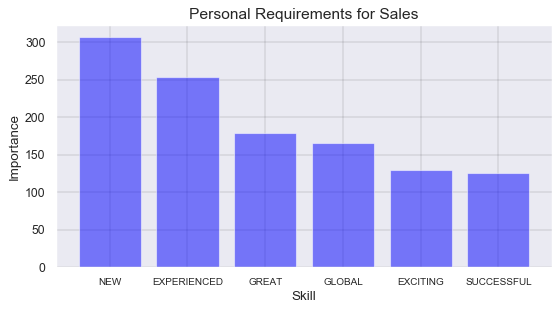

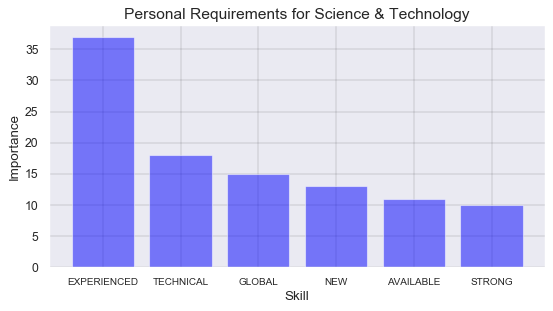

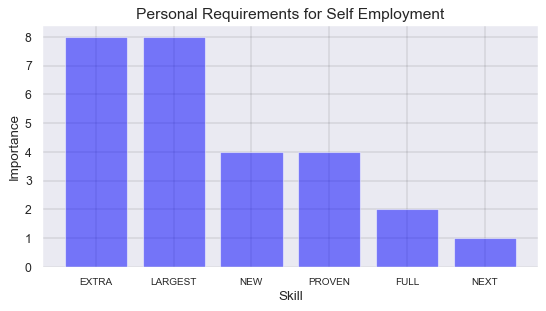

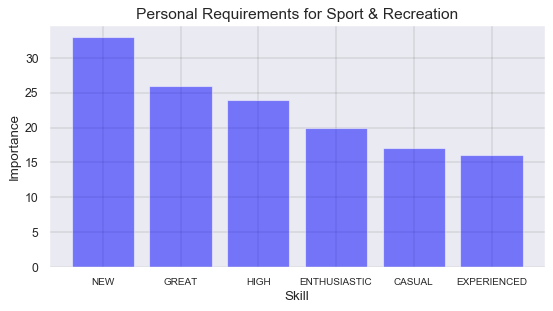

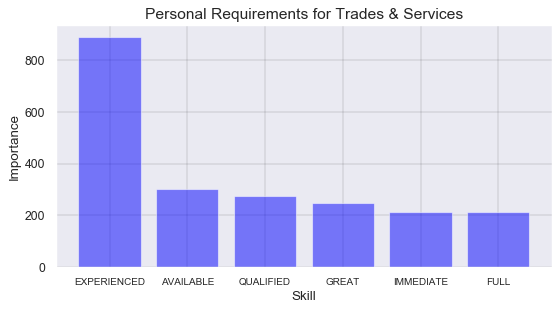

In [443]:
for s in sectors:
    series = skilldf[skilldf['Sector']==s]
    plot_linegraph_skills(series, "Skill", "Importance", "Personal Requirements for "+s, c='blue', rotate_x_axis=True)

In [516]:
df.set_index('Date')

Id  \
Date                                                            
2018-10-05                                           37400094   
2018-10-05                                           37400074   
2018-10-05                                           37400028   
2018-10-05                                           37400027   
2018-10-05                                           37400022   
2018-10-05                                           37399970   
2018-10-05                                           37399892   
2018-10-05                                           37399864   
2018-10-05                                           37399855   
2018-10-05                                           37399846   
2018-10-05                                           37399813   
2018-10-05                                           37399718   
2018-10-05                                           37399705   
2018-10-05                                           37399571   
2018-10-05                                           37399538   
2018-10-05                                           37399391   
2018-10-05                                           37399319   
2018-10-05                                           37399308   
2018-10-05                                           37399286   
2018-10-05                                           37399167   
2018-10-05                                           37399070   
2018-10-05                                           37399027   
2018-10-05                                           37399026   
2018-10-05                                           37398944   
2018-10-05                                           37398660   
2018-10-05                                           37398609   
2018-10-05                                           37398607   
2018-10-05                                           37398585   
2018-10-05                                           37398524   
2018-10-05                                           37398509   
...                                                       ...   
2018-12-06  37886515&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886514&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886513&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886511&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886512&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886510&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886507&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886509&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886508&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886458&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886453&searchrequesttoken=df032909-bc3a-4791...   
2018-12-06  37886451&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886437&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886285&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886193&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886184&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886173&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886164&searchrequesttoken=b6c6db9c-f5f9-4750...   
2018-12-06  37886125&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886100&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886058&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886042&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886033&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886026&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886025&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886021&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37886017&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37885987&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37885968&searchrequesttoken=3bc8f30f-a234-4b37...   
2018-12-06  37885954&searchre

In [563]:
s = df.groupby('Date')['AverageSalary'].mean()
s1 = df.groupby('Date')['MonthPosted'].mean()

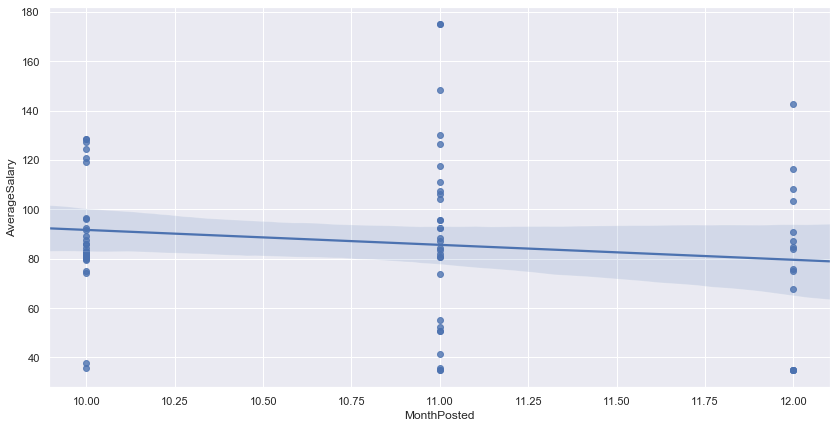

In [565]:

sns.regplot(s1, s)

In [714]:
def get_time_days(date):
    sp = date.split('-')
    years = int(sp[0]) * 365
    months = int(sp[1]) * 12
    days = int(sp[2]) * 1
    return years+months+days

In [715]:
#df_time = df.groupby('Date')
from datetime import datetime
newdf = df.filter(['Date', 'Classification'], axis=1)
newdf['Date'] = newdf['Date'].astype('str')

hottest_sectors = df.groupby('Classification')['Id'].count().nlargest(5)
topsectors = []
topsectors = [str(i) for i in hottest_sectors.index]


In [716]:
plots = dict()
for s in topsectors:
    counts = newdf[newdf['Classification']==s].groupby('Date')['Classification'].count()
    counts.index = [get_time_days(i) for i in counts.index]
    data = [counts.index,counts.values]
    plots[s] = data

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


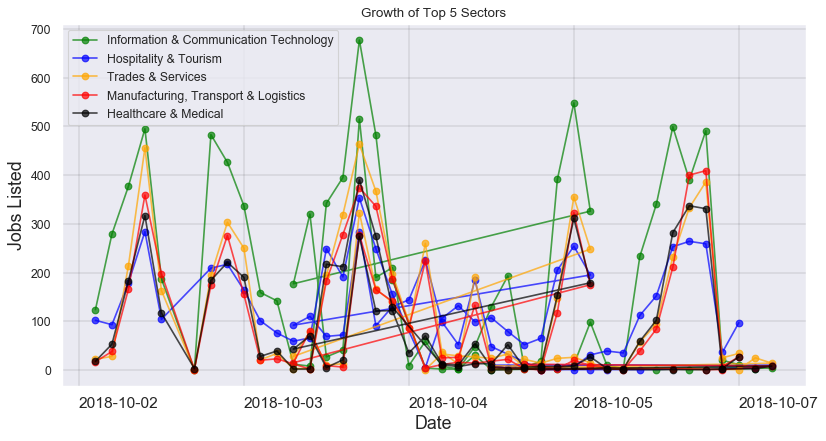

In [736]:
colors = ['green', 'blue', 'orange', 'red', 'black', 'white', 'cyan']
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
series = None
ind=0
for i in topsectors:
    series = plots[i]
    plt.plot(series[0], series[1], color=colors[ind], label=i, marker='o',alpha=0.7)
    ind+=1
plt.title("Growth of Top 5 Sectors")
ax = plt.subplot()
ax.set_xlabel("Date", fontsize='16')
ax.set_ylabel("Jobs Listed", fontsize='16')
ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
date_labels=labels=newdf.groupby('Date')['Classification'].count().index
#plt.xticks(np.arange(np.datetime64('2018-10-01'), np.datetime64('2018-12-15')))
ax.set_xticklabels(rotation = (0), fontsize = 14, va='top', ha='left', labels=date_labels)
ax.legend(loc="upper left")
plt.show()

In [743]:
from datetime import datetime
newdf = df.filter(['Date', 'Classification'], axis=1)
newdf['Date'] = newdf['Date'].astype('str')

hottest_sectors = df.groupby('Classification')['Id'].count().nlargest(5)
topsectors = []
topsectors = [str(i) for i in hottest_sectors.index]

plots = dict()
for s in topsectors:
    counts = newdf[newdf['Classification']==s].groupby('Date')['Classification'].count()
    data = [counts.index,counts.values]
    plots[s] = data

In [758]:
def add_days(datestr, days):
    print(datestr)
    sp = str(datestr).split('-')
    new_year = int(sp[0])
    new_month = int(sp[1])
    new_days = int(sp[2])
    if(new_days > 30):
        new_days=1
        new_month +=1
    if(new_month > 12):
        new_month = 1
        new_year += 1
    return str(new_year)+"-"+str(new_month)+"-"+str(new_days)
    

prediction_days = 365

for s in topsectors:
    k = 3
    series = plots[s]
    print(series[0])
    original_size = len(series[0]) - 1
    curdate = series[0][original_size]
    for i in range(0, original_size+prediction_days):
        curdate = add_days(curdate, 1)
        np.append(series[0], curdate)
        #series[0].add(curdate)
        moving_average = 0
        for j in range(1,k):
            moving_average += series[1][i-j]
        moving_average /= k
        #series[1].add(moving_average)
        np.append(series[1], moving_average)
    plots[s] = series

Index(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05',
       '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11',
       '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-21', '2018-10-22',
       '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
       '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
       '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06',
       '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10', '2018-11-11',
       '2018-11-12', '2018-11-13', '2018-11-20', '2018-11-23', '2018-11-24',
       '2018-11-25', '2018-11-29', '2018-11-30', '2018-12-03', '2018-12-04',
       '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09',
       '2018-12-10', '2018-12-11', '2018-12-12', '2018-12-13', '2018-12-14',
       '2018-12-15', '2018-12-16'],
      dtype='object', name='Date')
2018-

IndexError: index 62 is out of bounds for axis 0 with size 62

In [672]:
hottest_sectors = df.groupby('Classification')['Id'].count().nlargest(10)

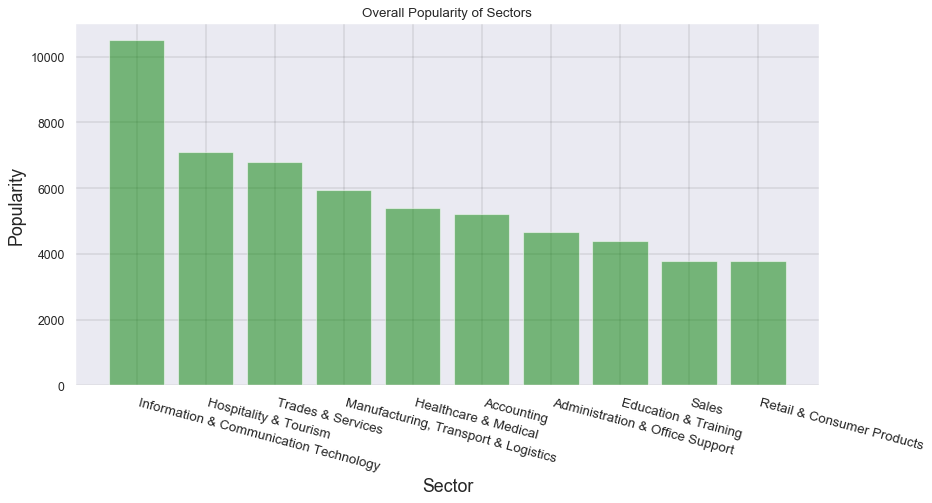

In [690]:
plot_bargraph(hottest_sectors, "Sector", "Popularity", "Overall Popularity of Sectors", c='green', rotate_x_axis=True,r=345)